In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit/Image Classifier/fruit/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3126 files belonging to 36 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit/Image Classifier/fruit/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:

cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 920s 9s/step - loss: 7.8505 - accuracy: 0.0298 - val_loss: 3.5783 - val_accuracy: 0.0306
Epoch 2/32
98/98 [==============================] - 73s 699ms/step - loss: 3.5642 - accuracy: 0.0416 - val_loss: 3.5698 - val_accuracy: 0.0418
Epoch 3/32
98/98 [==============================] - 74s 704ms/step - loss: 3.5374 - accuracy: 0.0505 - val_loss: 3.4398 - val_accuracy: 0.0752
Epoch 4/32
98/98 [==============================] - 70s 676ms/step - loss: 3.5028 - accuracy: 0.0477 - val_loss: 3.3686 - val_accuracy: 0.0836
Epoch 5/32
98/98 [==============================] - 73s 693ms/step - loss: 3.3466 - accuracy: 0.0633 - val_loss: 3.2285 - val_accuracy: 0.1170
Epoch 6/32
98/98 [==============================] - 76s 718ms/step - loss: 3.2505 - accuracy: 0.0816 - val_loss: 3.0849 - val_accuracy: 0.2006
Epoch 7/32
98/98 [==============================] - 71s 680ms/step - loss: 3.1999 - accuracy: 0.0940 - val_loss: 3.1181 - val_accuracy: 0.1448
E

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 75s 669ms/step - loss: 0.2586 - accuracy: 0.9367
Training accuracy: 0.9366602897644043


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)

12/12 [==============================] - 9s 262ms/step - loss: 0.3799 - accuracy: 0.9220


In [20]:
print('Validation accuracy:', val_acc)

Validation accuracy: 0.9220055937767029


In [21]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
training_history.history #Return Dictionary of history

{'loss': [7.850468635559082,
  3.5641579627990723,
  3.537435531616211,
  3.5028491020202637,
  3.346586227416992,
  3.25051212310791,
  3.199890375137329,
  3.0896658897399902,
  2.9645488262176514,
  2.8741962909698486,
  2.7199387550354004,
  2.609977960586548,
  2.4234201908111572,
  2.2688028812408447,
  2.154663562774658,
  2.134373188018799,
  1.9318147897720337,
  1.8223915100097656,
  1.7373554706573486,
  1.5573041439056396,
  1.4652575254440308,
  1.4030327796936035,
  1.2810429334640503,
  1.2651801109313965,
  1.1839900016784668,
  1.0520118474960327,
  0.9803996086120605,
  0.9276502728462219,
  0.8675273656845093,
  0.7842060923576355,
  0.8343744277954102,
  0.6685003042221069],
 'accuracy': [0.029750479385256767,
  0.04158669337630272,
  0.05054382607340813,
  0.04766474664211273,
  0.0633397325873375,
  0.08157389611005783,
  0.09404990077018738,
  0.12220089882612228,
  0.16634677350521088,
  0.20121560990810394,
  0.23096609115600586,
  0.2607165575027466,
  0.30102

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [25]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 92.20055937767029 %


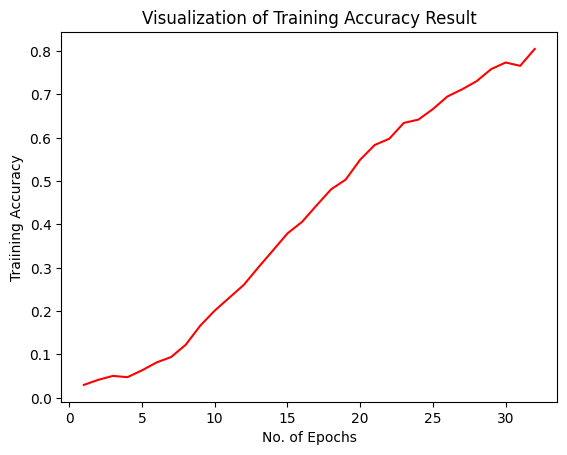

In [26]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


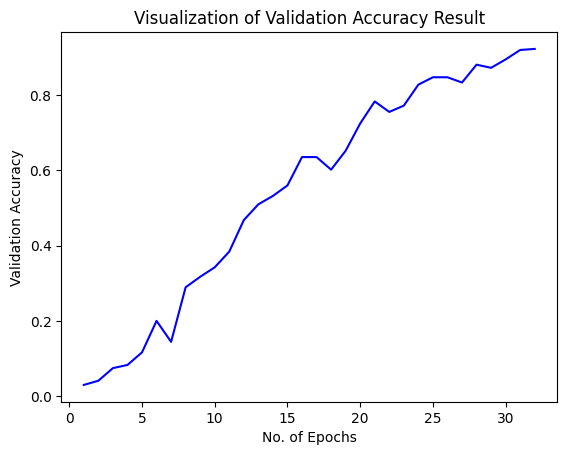

In [27]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit/Image Classifier/fruit/test/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [29]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 68s 1s/step - loss: 0.3799 - accuracy: 0.9220
Test accuracy: 0.9220055937767029


In [31]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

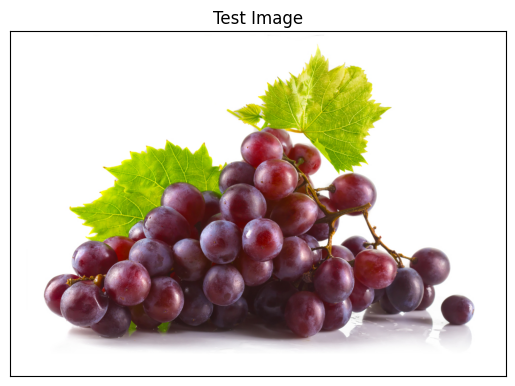

In [30]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Fruit/Image Classifier/fruit/test/grapes/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 370ms/step


In [33]:
print(predictions)

[[3.17305449e-09 4.82545603e-09 7.78574893e-09 4.82065365e-09
  1.74289050e-13 5.73593937e-08 1.09635565e-11 6.61888011e-09
  1.11772072e-12 1.59010227e-08 4.61539168e-10 2.68472604e-07
  2.65173043e-07 1.79745246e-06 9.99994278e-01 2.06943476e-08
  2.47942944e-06 2.51046731e-12 2.46281684e-12 2.59325533e-10
  2.53677275e-08 3.22561491e-11 6.67547560e-13 3.69297553e-08
  4.15008826e-12 1.97958610e-08 2.21223768e-11 3.65961455e-07
  4.36661196e-08 8.97223129e-10 9.54346158e-10 7.43225592e-10
  4.16997478e-11 9.85548232e-13 4.49051669e-07 4.22775898e-10]]


In [34]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

14


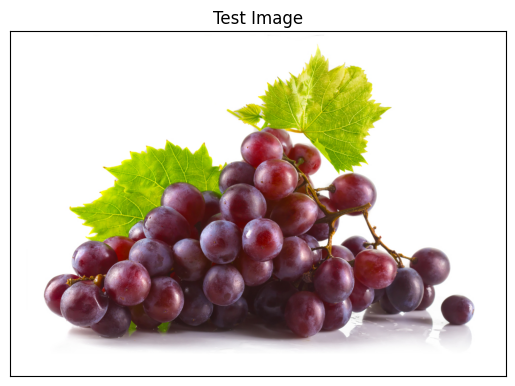

In [35]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
print("It's a {}".format(test_set.class_names[result_index]))


It's a grapes
